In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# just some random numbers to get startet

for year in np.arange(2011, 2022, 1):
    globals()['stations_' + str(year)] = np.load('/data/user/slehrman/s125arrays/stations_{}.npy'.format(year))
    globals()['s125_' + str(year)] = np.load('/data/user/slehrman/s125arrays/s125_{}.npy'.format(year))
    
    globals()['s125_' + str(year)] = globals()['s125_' + str(year)][np.where(globals()['stations_' + str(year)] >=5)]
    globals()['stations_' + str(year)] = globals()['stations_' + str(year)][np.where(globals()['stations_' + str(year)] >=5)]
    
    globals()['s125_' + str(year)] = globals()['s125_' + str(year)][np.where(globals()['stations_' + str(year)] < 20)]
    globals()['stations_' + str(year)] = globals()['stations_' + str(year)][np.where(globals()['stations_' + str(year)] < 20)]
    
    globals()['s125_' + str(year)] = np.log10(globals()['s125_' + str(year)])

    index = np.where(np.isnan(globals()['s125_' + str(year)]))
    globals()['s125_' + str(year)] = np.delete(globals()['s125_' + str(year)], index)
    globals()['stations_' + str(year)] = np.delete(globals()['stations_' + str(year)], index)

    globals()['stations_' + str(year)] = globals()['stations_' + str(year)][np.where(np.isfinite(globals()['s125_' + str(year)]))]
    globals()['s125_' + str(year)] = globals()['s125_' + str(year)][np.where(np.isfinite(globals()['s125_' + str(year)]))]
    
    print(year, len(globals()['stations_' + str(year)]), len(globals()['s125_' + str(year)]))

#184310975
'''
2011 13378598 13378598
2012 12273037 12273037
2013 10377383 10377383
2014 8829050 8829050
2015 8413590 8413590
2016 6327185 6327185
2017 6988381 6988381
2018 5081746 5081746
2019 3602092 3602092
2020 3653899 3653899
2021 3156080 3156080
'''

2011 13378598 13378598
2012 12273037 12273037
2013 10377383 10377383
2014 8829050 8829050
2015 8413590 8413590
2016 6327185 6327185
2017 6988381 6988381
2018 5081746 5081746
2019 3602092 3602092
2020 3653899 3653899
2021 3156080 3156080


'\n2011 13378598 13378598\n2012 12273037 12273037\n2013 10377383 10377383\n2014 8829050 8829050\n2015 8413590 8413590\n2016 6327185 6327185\n2017 6988381 6988381\n2018 5081746 5081746\n2019 3602092 3602092\n2020 3653899 3653899\n2021 3156080 3156080\n'

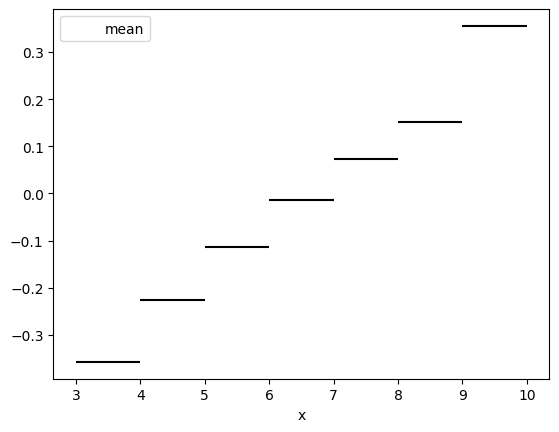

In [2]:
df = pd.DataFrame({'x': stations_2011, 'y': s125_2011})


# calculate in which bin row belongs base on `x`
# bins needs the bin edges, so this will give as 100 equally sized bins
bins = np.arange(3, 11, 1)
df['bin'] = np.digitize(stations_2011, bins=bins+1)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

# grouby bin, so we can calculate stuff
binned = df.groupby('bin')
# calculate mean and standard error of the mean for y in each bin
result = binned['y'].agg(['mean', 'sem'])
result['x'] = bin_centers
result['xerr'] = bin_width / 2

# plot it

result.plot(
    x='x',
    y='mean',
    xerr='xerr',
    yerr='sem',
    linestyle='none',
    capsize=0,
    color='black',
)

plt.show()

<ErrorbarContainer object of 3 artists>

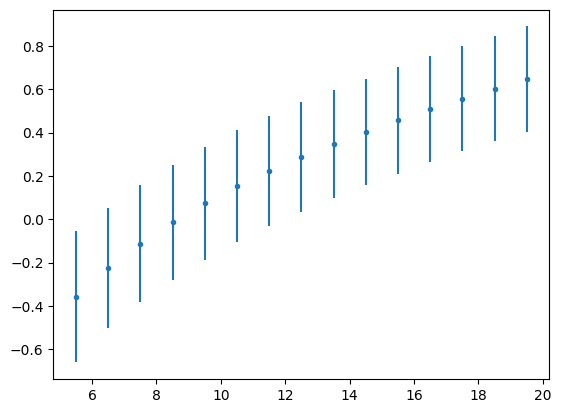

In [3]:
import scipy.stats
import numpy
import matplotlib.pyplot as plt

x = stations_2011
y = s125_2011

bins = np.arange(3, 101, 1)

means_result = scipy.stats.binned_statistic(x, [y, y**2], bins=bins, range=(0,1), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = numpy.sqrt(means2 - means**2)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.')

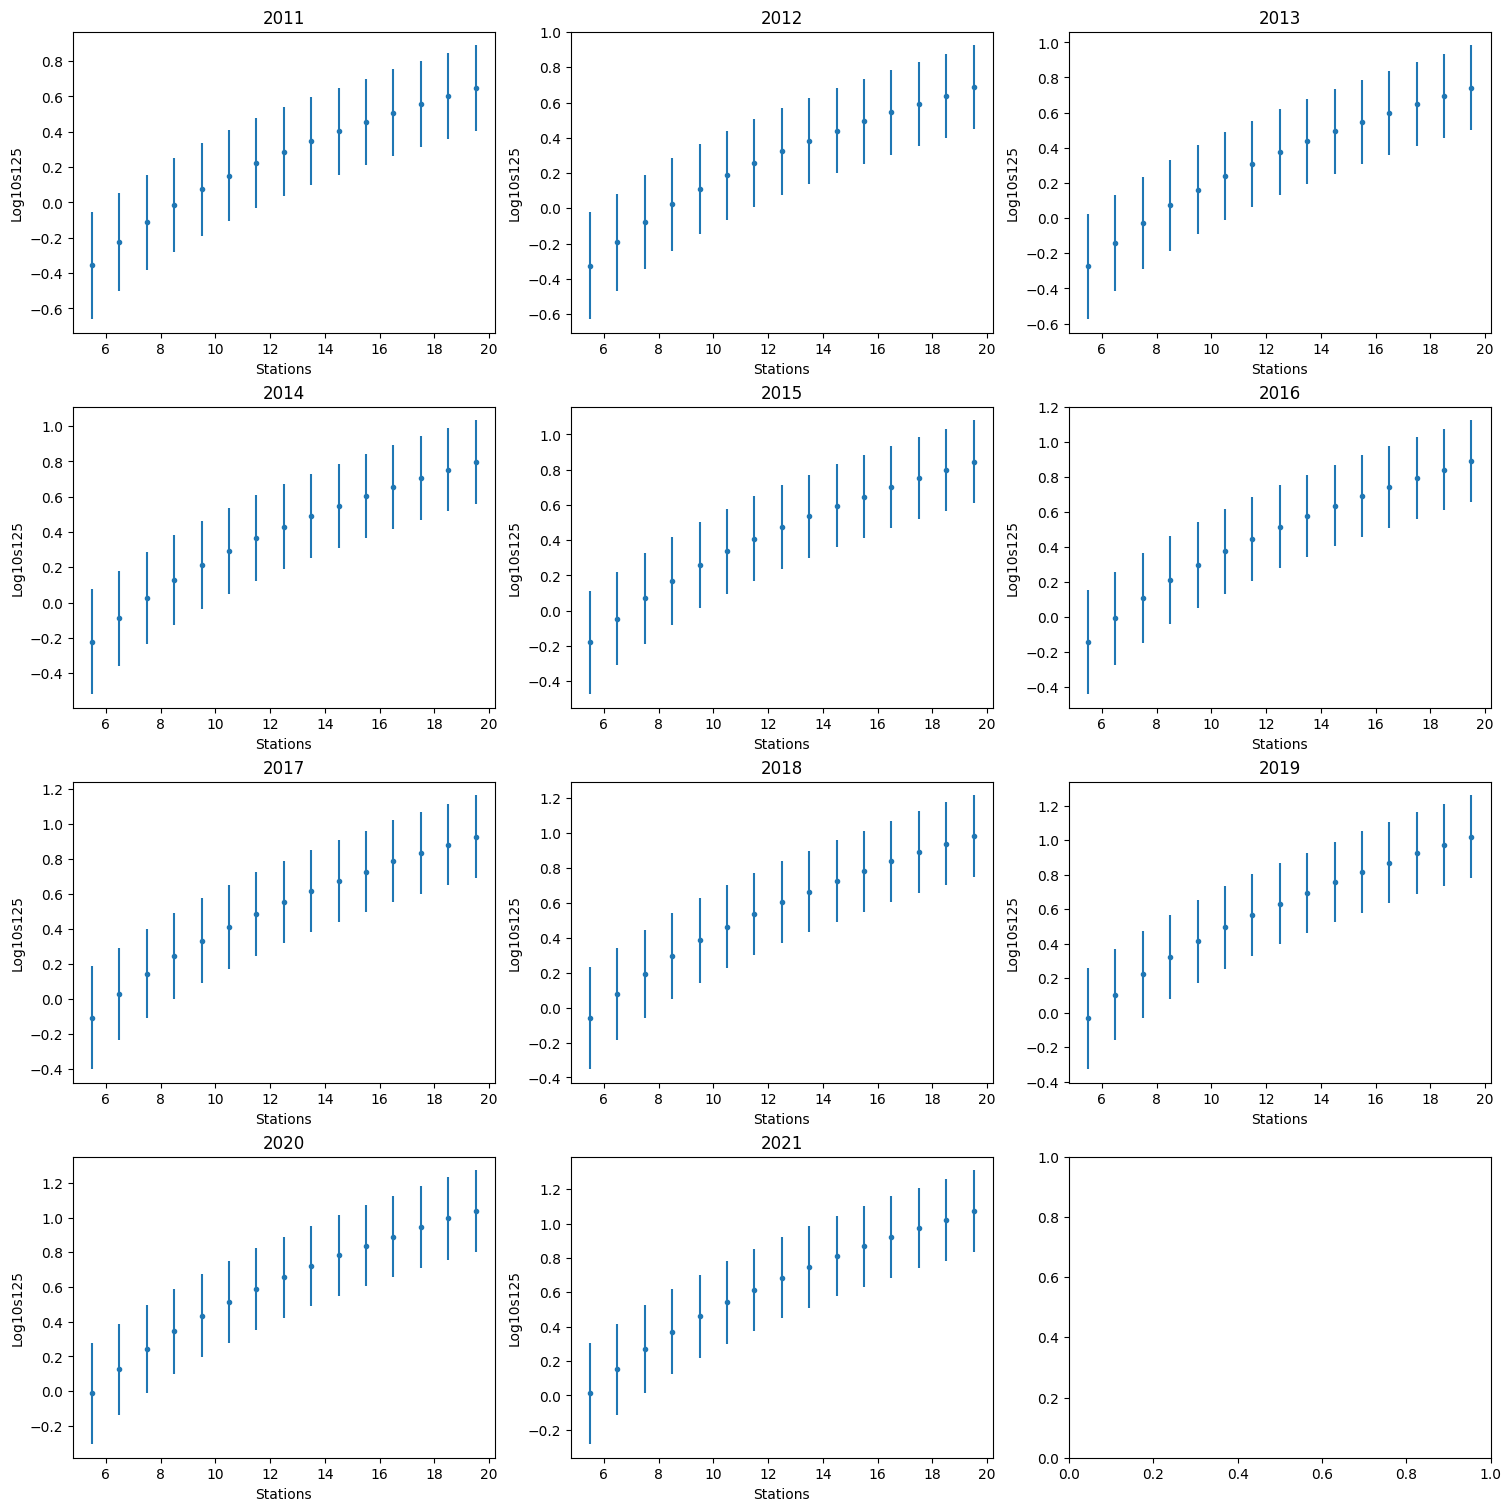

In [4]:
import scipy.stats
import numpy
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize = (15,15), constrained_layout=True)

n = 0
m = 0

for year in np.arange(2011, 2022, 1):
    x = globals()['stations_'+str(year)]
    y = globals()['s125_'+str(year)]

    bins = np.arange(3, 101, 1)

    means_result = scipy.stats.binned_statistic(x, [y, y**2], bins=bins, range=(0,1), statistic='mean')
    means, means2 = means_result.statistic
    standard_deviations = numpy.sqrt(means2 - means**2)
    bin_edges = means_result.bin_edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

    axs[m,n].errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.')
    axs[m,n].set_title(str(year))
    axs[m,n].set_xlabel('Stations')
    axs[m,n].set_ylabel('Log10s125')
    
    
    if n == 2:
        m += 1
        n = 0
    else:
        n += 1
    
fig.show()



2011: 13378598 clean data points
2021: 3156080 clean data points


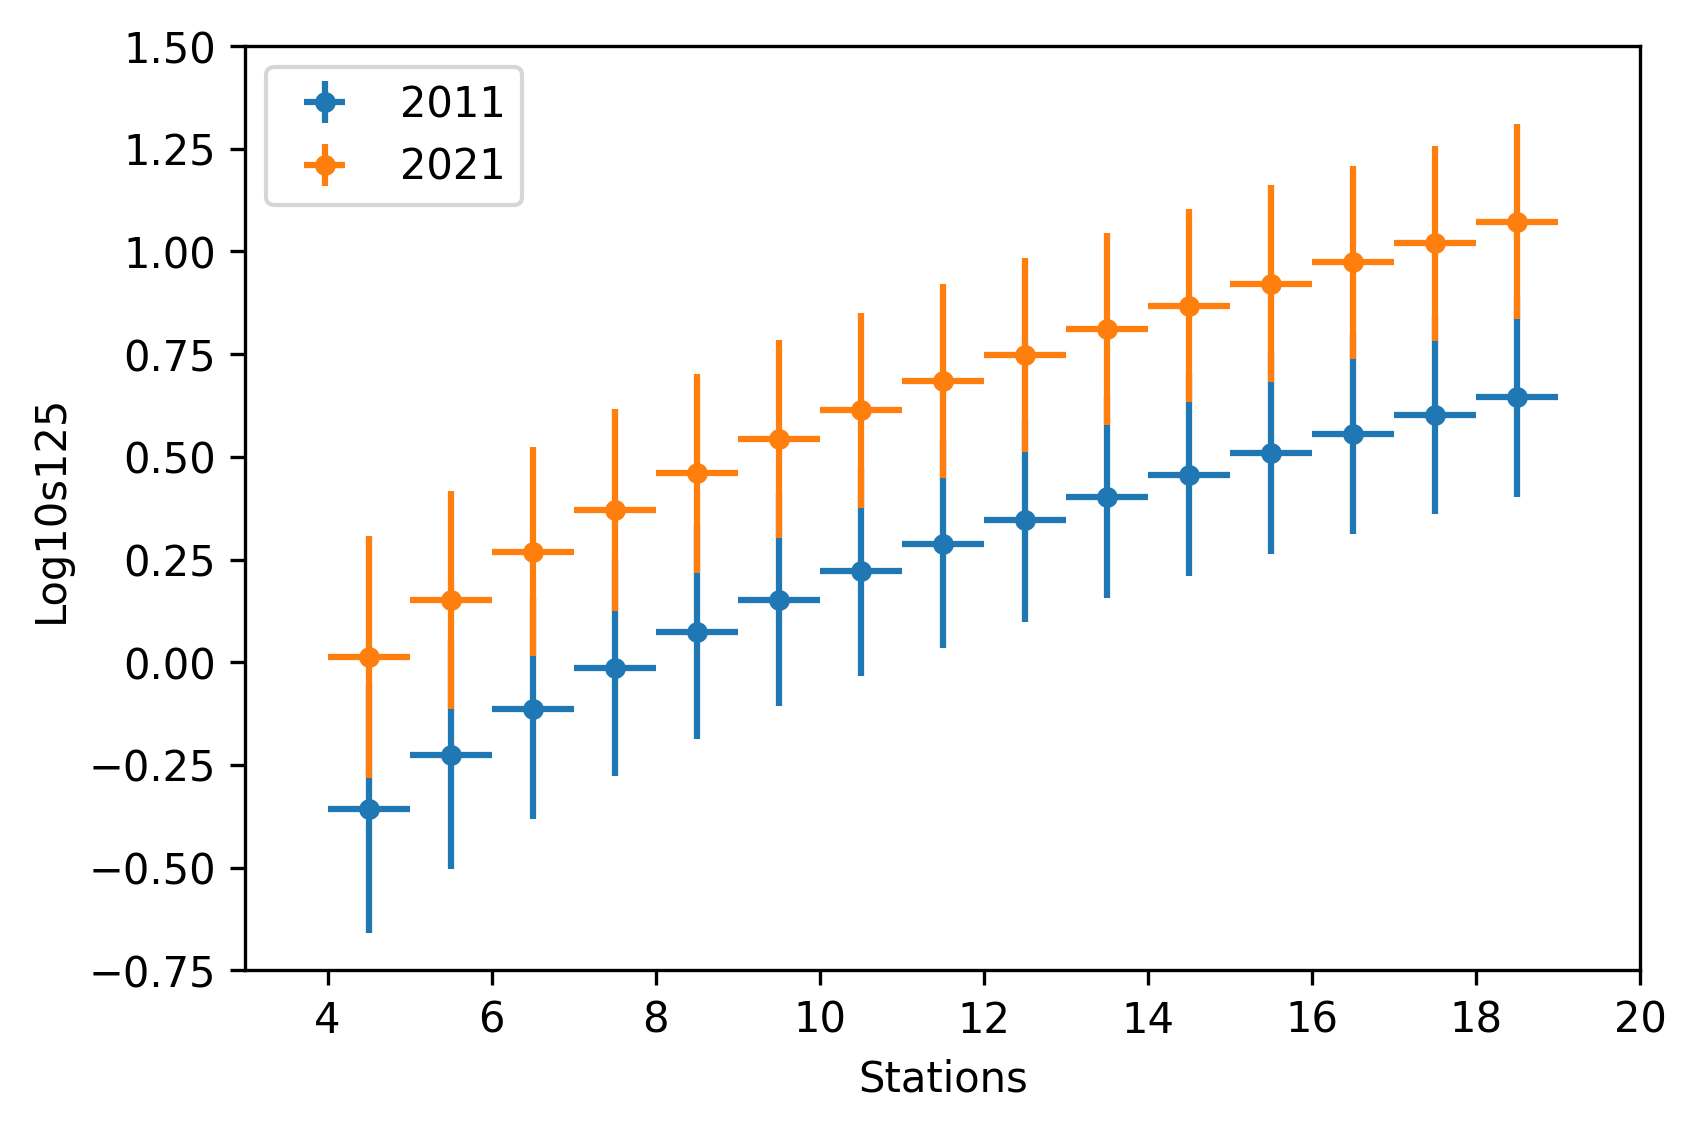

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=300)

for year in [2011, 2021]:
    x_raw = globals()['stations_'+str(year)]
    y_raw = globals()['s125_'+str(year)]
    
    # Create DataFrame and let pandas handle type conversion
    df = pd.DataFrame({
        'stations': pd.to_numeric(x_raw, errors='coerce'),
        's125': pd.to_numeric(y_raw, errors='coerce')
    })
    
    # Drop NaN values
    df = df.dropna()
    
    print(f"{year}: {len(df)} clean data points")
    
    # Bin using pandas
    bins = np.arange(3, 21, 1)
    df['bin'] = pd.cut(df['stations'], bins=bins, include_lowest=True)
    
    binned = df.groupby('bin').agg({
        's125': ['mean', 'std', 'count']
    }).droplevel(0, axis=1)  # Flatten column names
    
    bin_centers = (bins[:-1] + bins[1:]) / 2
    binned['x'] = bin_centers
    
    plt.errorbar(x=binned['x'], y=binned['mean'], 
                 xerr=0.5, yerr=binned['std'],
                 linestyle='none', marker='.', label=str(year), markersize=8)

plt.legend(loc='upper left')
#plt.title('Log10s125 vs nStations for Burnsample')
plt.xlabel('Stations')
plt.ylabel('Log10s125')
plt.xlim(3, 20)  # Set x-axis limits
plt.ylim(-0.75, 1.5)

plt.show()
